In [2]:
import pandas as pd

calls_by_district_and_time_segment = pd.read_csv('../data/clean/calls_by_district_and_time_segment.csv')
calls_by_district_and_time_segment[['NAME', 'weekday', 'week_of_year', 'time_segment']].value_counts()

NAME       weekday    week_of_year  time_segment
SOUTH END  Friday     18            AFTERNOON_3     26
SHAWNEE    Friday     50            AFTERNOON_3     20
SOUTH END  Friday     18            AFTERNOON_2     20
SHAWNEE    Friday     17            AFTERNOON_2     19
           Tuesday    51            MORNING_4       17
                                                    ..
SOUTH END  Sunday     32            MORNING_4        1
                                    MORNING_3        1
                                    MORNING_2        1
           Friday     38            MORNING_3        1
           Wednesday  53            MORNING_1        1
Name: count, Length: 10710, dtype: int64

week of year being numerical might be a problem

might need to put year back into the data

could average the count over all the years, or see if it's been steadily going up over the years (or going down, following some pattern)

In [2]:
calls_by_district_and_time_segment_with_year = pd.read_csv('../data/clean/calls_by_district_and_time_segment_with_year.csv')
calls_by_district_and_time_segment_with_year[['NAME', 'weekday', 'week_of_year', 'time_segment', 'year']].value_counts()

NAME        weekday    week_of_year  time_segment  year
SOUTH END   Friday     18            AFTERNOON_3   2018    12
FRIENDSHIP  Thursday   29            MORNING_4     2017     8
SOUTH END   Saturday   35            AFTERNOON_1   2024     8
            Friday     43            AFTERNOON_2   2024     8
FRIENDSHIP  Friday     37            AFTERNOON_3   2023     7
                                                           ..
ROUSS       Sunday     51            AFTERNOON_4   2020     1
                                                   2016     1
                                     AFTERNOON_3   2023     1
                                     AFTERNOON_2   2024     1
SOUTH END   Wednesday  53            MORNING_1     2020     1
Name: count, Length: 32400, dtype: int64

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Get value counts as a DataFrame
counts = calls_by_district_and_time_segment_with_year[['NAME', 'weekday', 'week_of_year', 'time_segment', 'year']] \
    .value_counts().reset_index(name='call_count')

# Step 2: One-hot encode categorical columns
counts_encoded = pd.get_dummies(counts, columns=['NAME', 'weekday', 'time_segment'])

# Step 3: Split into features and target
X = counts_encoded.drop(columns='call_count')
y = counts_encoded['call_count']

# Step 4: Train, validation, and test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Step 5: Train simple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
val_rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print('Train RMSE:', train_rmse)
print('Validation RMSE:', val_rmse)
print('Test RMSE:', test_rmse)


Train RMSE: 0.6236700776423358
Validation RMSE: 0.6130973044386522
Test RMSE: 0.6029743568761035


In [33]:
df = calls_by_district_and_time_segment_with_year.copy()

filtered = df[
    (df['weekday'] == 'Friday') &
    (df['time_segment'] == 'AFTERNOON_1') &
    (df['week_of_year'] == 2)
    ]

# Count number of calls by year
call_counts = filtered['year'].value_counts().sort_index()

print(call_counts)


year
2017    1
2018    1
2019    2
2020    5
2021    6
2023    4
2024    2
2025    6
Name: count, dtype: int64


In [ ]:
df = calls_by_district_and_time_segment_with_year.copy()

# Count how many times each time segment appears (i.e., number of calls)
avg_calls = df['time_segment'].value_counts().mean()

print("Average number of calls per time segment:", avg_calls)


In [36]:
counts = calls_by_district_and_time_segment_with_year[['NAME', 'weekday', 'week_of_year', 'time_segment', 'year']] \
    .value_counts().reset_index(name='call_count')

# Step 2: One-hot encode categorical columns
counts_encoded = pd.get_dummies(counts, columns=['NAME', 'weekday', 'time_segment'])

avg_calls = counts['call_count'].mean()

print(avg_calls)

1.3173765432098765


Could this be an issue here with there being no entries with 0 for a particular station, weekday, week of year, time segment, and year combination.

In [37]:
counts.head()

,NAME,weekday,week_of_year,time_segment,year,call_count
0,SOUTH END,Friday,18,AFTERNOON_3,2018,12
1,FRIENDSHIP,Thursday,29,MORNING_4,2017,8
2,SOUTH END,Saturday,35,AFTERNOON_1,2024,8
3,SOUTH END,Friday,43,AFTERNOON_2,2024,8
4,FRIENDSHIP,Friday,37,AFTERNOON_3,2023,7


In [39]:
df = calls_by_district_and_time_segment_with_year.copy()

filtered = df[
    (df['weekday'] == 'Friday') &
    (df['week_of_year'] == 18) &
    (df['time_segment'] == 'AFTERNOON_3') &
    (df['year'] == 2018)
    ]

print(filtered)


                         CallDescription        NAME weekday  week_of_year  \
7017                             Z-Other   SOUTH END  Friday            18   
7023                             Z-Other   SOUTH END  Friday            18   
7030                             Z-Other  FRIENDSHIP  Friday            18   
7032                             Assault  FRIENDSHIP  Friday            18   
7033                         Sick Person   SOUTH END  Friday            18   
7034          Chest Pain (Non-Traumatic)   SOUTH END  Friday            18   
7035  Unconscious/Fainting/Near-Fainting   SOUTH END  Friday            18   
7040                   Breathing Problem   SOUTH END  Friday            18   
7143            Allergic Reaction/Stings   SOUTH END  Friday            18   
7232            Allergic Reaction/Stings   SOUTH END  Friday            18   
7245                   Breathing Problem   SOUTH END  Friday            18   
7264            Allergic Reaction/Stings   SOUTH END  Friday    

In [39]:
import pandas as pd
import numpy as np

# Step 1: Count actual calls per combo (keep week_of_year as numeric)
counts = (
    calls_by_district_and_time_segment_with_year[['NAME', 'weekday', 'week_of_year', 'time_segment', 'year']]
    .value_counts()
    .reset_index(name='call_count')
)

# Step 2: Get active year range per NAME
active_ranges = (
    calls_by_district_and_time_segment_with_year
    .groupby('NAME')
    .agg(min_year=('year', 'min'), max_year=('year', 'max'))
    .reset_index()
)

# Step 3: Build full grid of all combos
names = calls_by_district_and_time_segment_with_year['NAME'].unique()
weekdays = calls_by_district_and_time_segment_with_year['weekday'].unique()
weeks = calls_by_district_and_time_segment_with_year['week_of_year'].unique()
segments = calls_by_district_and_time_segment_with_year['time_segment'].unique()
years = calls_by_district_and_time_segment_with_year['year'].unique()

full_grid = pd.MultiIndex.from_product(
    [names, weekdays, weeks, segments, years],
    names=['NAME', 'weekday', 'week_of_year', 'time_segment', 'year']
).to_frame(index=False)

# Step 4: Filter grid to active periods only
full_grid = full_grid.merge(active_ranges, on='NAME', how='left')
full_grid = full_grid[
    (full_grid['year'] >= full_grid['min_year']) &
    (full_grid['year'] <= full_grid['max_year'])
    ].drop(columns=['min_year', 'max_year'])

# Step 5: Merge with actual counts
counts_full = full_grid.merge(
    counts,
    on=['NAME', 'weekday', 'week_of_year', 'time_segment', 'year'],
    how='left'
)

# Step 6: Fill missing counts with 0
counts_full['call_count'] = counts_full['call_count'].fillna(0).astype(int)

# Step 7: Add cyclical encoding for week_of_year
counts_full['week_of_year_sin'] = np.sin(2 * np.pi * counts_full['week_of_year'] / 53.0)
counts_full['week_of_year_cos'] = np.cos(2 * np.pi * counts_full['week_of_year'] / 53.0)

# Step 8: Drop the raw week_of_year column (optional)
counts_full = counts_full.drop(columns=['week_of_year'])

# Done
print(counts_full['call_count'].value_counts())


call_count
0     86320
1     24351
2      6278
3      1404
4       303
5        47
6        10
7         3
8         3
12        1
Name: count, dtype: int64



=== Logistic Regression (class_weight='balanced') ===

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.65      0.78     22134
           1       0.12      0.64      0.20      1610

    accuracy                           0.65     23744
   macro avg       0.54      0.65      0.49     23744
weighted avg       0.90      0.65      0.74     23744

Validation Confusion Matrix:
[[14417  7717]
 [  579  1031]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.65      0.77     22134
           1       0.11      0.60      0.19      1610

    accuracy                           0.65     23744
   macro avg       0.53      0.62      0.48     23744
weighted avg       0.90      0.65      0.73     23744

Test Confusion Matrix:
[[14396  7738]
 [  646   964]]

Top 20 Logistic Regression Features:
time_segment_MORNING_2     -1.290084
time_segment_MORNING_1     -0.910777
t

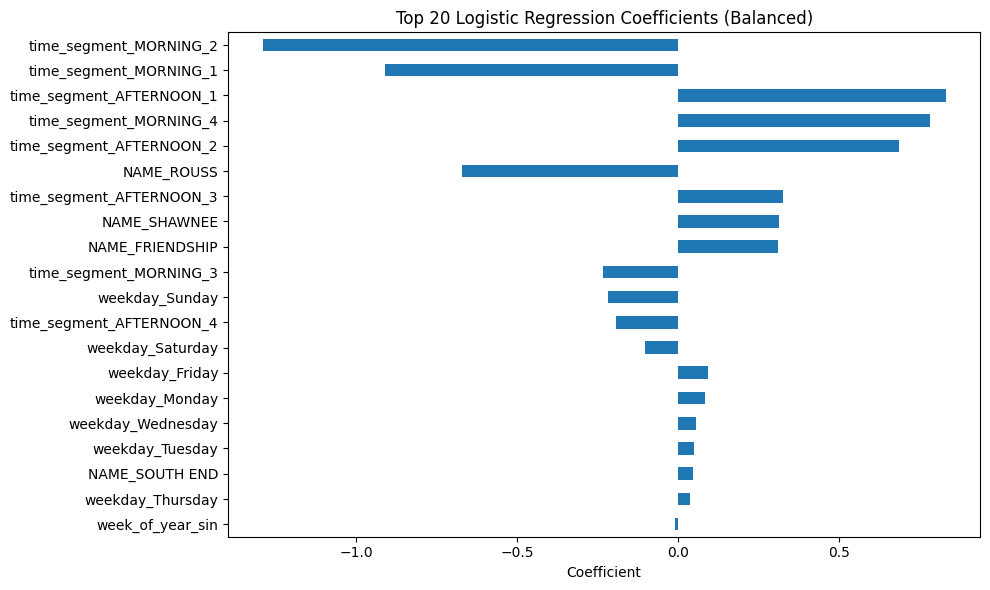


=== Random Forest (class_weight='balanced') ===

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     22134
           1       0.16      0.03      0.05      1610

    accuracy                           0.92     23744
   macro avg       0.55      0.51      0.51     23744
weighted avg       0.88      0.92      0.90     23744

Validation Confusion Matrix:
[[21878   256]
 [ 1562    48]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     22134
           1       0.17      0.03      0.05      1610

    accuracy                           0.92     23744
   macro avg       0.55      0.51      0.51     23744
weighted avg       0.88      0.92      0.90     23744

Test Confusion Matrix:
[[21893   241]
 [ 1561    49]]

Top 20 Random Forest Features:
year                        0.282877
week_of_year_sin            0.248399
week_of_year_

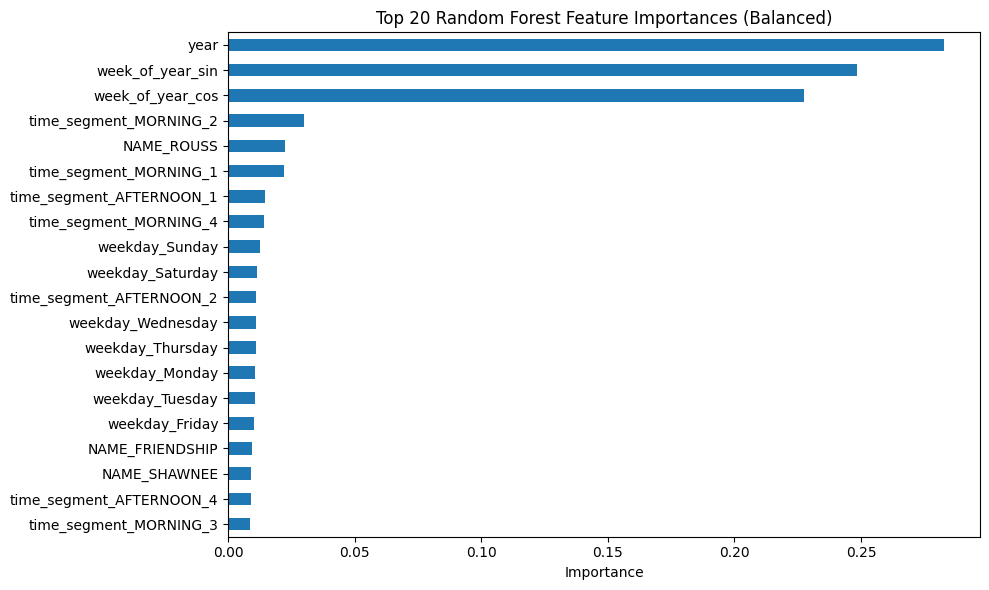

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Create binary target for calls > 1
counts_full['calls_gt1'] = (counts_full['call_count'] > 1).astype(int)

# Step 2: One-hot encode categorical columns
counts_encoded = pd.get_dummies(
    counts_full.drop(columns=['call_count']),
    columns=['NAME', 'weekday', 'time_segment']
)

# Step 3: Split features and target
X = counts_encoded.drop(columns=['calls_gt1'])
y = counts_full['calls_gt1']

# Step 4: Split into train/val/test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# ----- STRATEGY 1: Logistic Regression with Class Weight Balanced -----

print("\n=== Logistic Regression (class_weight='balanced') ===")
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

# Predict
y_val_pred_lr = lr.predict(X_val)
y_test_pred_lr = lr.predict(X_test)

# Evaluation
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_lr))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_lr))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))

# Feature Importance
lr_coefs = pd.Series(lr.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("\nTop 20 Logistic Regression Features:")
print(lr_coefs.head(20))

# Plot top 20
plt.figure(figsize=(10, 6))
lr_coefs.head(20).plot(kind='barh')
plt.title("Top 20 Logistic Regression Coefficients (Balanced)")
plt.xlabel("Coefficient")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ----- STRATEGY 2: Random Forest with Class Weight Balanced -----

print("\n=== Random Forest (class_weight='balanced') ===")
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict
y_val_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test)

# Evaluation
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_rf))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_rf))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

# Feature importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 20 Random Forest Features:")
print(rf_importance.head(20))

# Plot top 20
plt.figure(figsize=(10, 6))
rf_importance.head(20).plot(kind='barh')
plt.title("Top 20 Random Forest Feature Importances (Balanced)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()